<a href="https://colab.research.google.com/github/AvaCook/cs315/blob/main/selectionPoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ava Cook HW 4
Used ChatGPT to help with Ratio test and matplotlib visualization

In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:

# Selection sort implementation
def selection(A, print_flag=False):
    n = len(A)
    for i in range(n-1):
        smallest = i
        for j in range(i+1, n):
            if A[smallest] > A[j]:
                smallest = j
        A[i], A[smallest] = A[smallest], A[i]
        if print_flag:
            print(f"Step {i+1}: {A}")
    return A

In [8]:

# Timing wrapper
def time_algorithm(algorithm, arr):
    start = time.time()
    algorithm(arr.copy())   # use copy so input stays same
    end = time.time()
    return end - start

# --- Data generation helper ---
def generate_input_list(n, randomize=True):
    if randomize:
        # Random data
        return [random.randint(1, 1000000) for _ in range(n)]
    else:
        # Already sorted data
        return list(range(1, n+1))


# Test sizes for Selection Sort
Ns = [500, 1000, 2000, 4000, 8000]
times = []

for n in Ns:
    arr = generate_input_list(n, randomize=True)
    t = time_algorithm(selection, arr)
    times.append(t)


N values: [500, 1000, 2000, 4000, 8000]
Times: [0.0041027069091796875, 0.01899123191833496, 0.0668027400970459, 0.2554435729980469, 1.042330265045166]
Ratios (T(2n)/T(n)): [4.628951650395165, 3.517556964409014, 3.8238487317579795, 4.080471678389558]


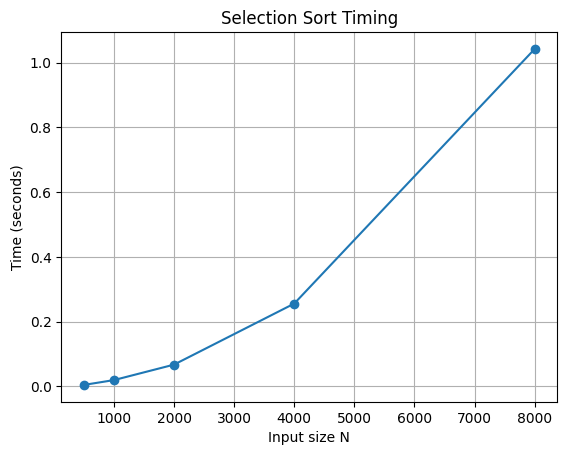

In [9]:
# Print results
print("N values:", Ns)
print("Times:", times)

# Ratio Test (expected ~4 since O(n^2))
ratios = []
for i in range(1, len(times)):
    ratios.append(times[i] / times[i-1])
print("Ratios (T(2n)/T(n)):", ratios)

# Plot
plt.plot(Ns, times, marker='o')
plt.xlabel('Input size N')
plt.ylabel('Time (seconds)')
plt.title('Selection Sort Timing')
plt.grid(True)
plt.show()